In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import tqdm
import subprocess

SAMPLES_PER_EXPERIMENT = 100

In [2]:
def run_experiment(log_db_size, blocks_per_entry, samples):
    cmd = f"./../bin/server {log_db_size} {blocks_per_entry} {samples}"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    output = result.stdout.strip().splitlines()
    throughput_line = output[-1]  # format example: Average throughput for 100 samples: 32258.71 MB/s, Std: 4986.56 MB/s

    throughput, std = re.findall(r"(\d+\.\d*) MB\/s", throughput_line)
    return float(throughput), float(std)

In [3]:
log_db_size = 30
experiments = []
for i in tqdm.tqdm(range(10)):
    blocks_per_entry = 1 << i
    throughput, std = run_experiment(log_db_size, blocks_per_entry, SAMPLES_PER_EXPERIMENT)
    experiments.append((blocks_per_entry, throughput, std))

100%|██████████| 10/10 [03:29<00:00, 20.91s/it]


In [4]:
df = pd.DataFrame(experiments, columns=["Blocks Per Entry", "Throughput (MB/s)", "Std"])
df

,Blocks Per Entry,Throughput (MB/s),Std
0,1,11403.05,580.76
1,2,13321.74,963.97
2,4,17376.04,1219.41
3,8,20123.06,1776.14
4,16,22522.96,2390.09
5,32,25956.76,3138.35
6,64,28114.45,3945.25
7,128,32414.81,5092.38
8,256,30763.10,5324.56
9,512,29559.58,5443.01


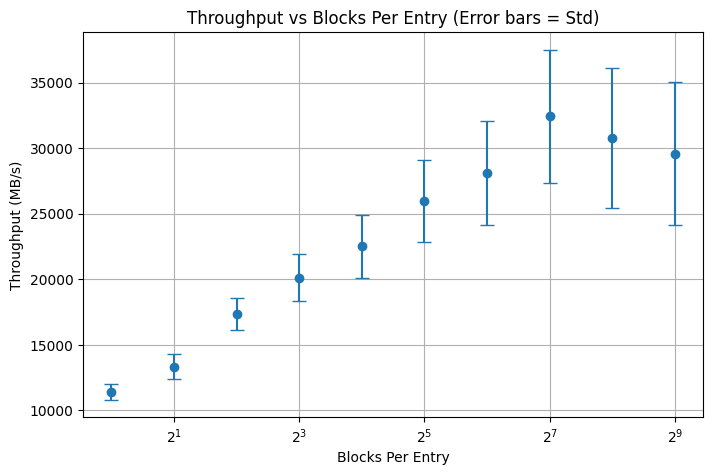

In [5]:
plt.figure(figsize=(8, 5))
plt.errorbar(df["Blocks Per Entry"], df["Throughput (MB/s)"], yerr=df["Std"], fmt='o', capsize=5)
plt.xlabel("Blocks Per Entry")
plt.ylabel("Throughput (MB/s)")
plt.title("Throughput vs Blocks Per Entry (Error bars = Std)")
plt.xscale("log", base=2)
plt.grid(True)
plt.show()